In [ ]:
import os
cd = os.getcwd()
print(cd)

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

/content
Mounted at /content/gdrive


In [ ]:
static = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/SPH6004/TeamShare/RawData/static.csv')

dynamic = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/SPH6004/TeamShare/RawData/dynamic.csv')


In [ ]:
dynamic.head()

,id,charttime,albumin,globulin,total_protein,aniongap,bicarbonate,bun,calcium,chloride,...,sodium_bg,lactate_bg,glucose_bg,d_dimer,fibrinogen,thrombin,inr,pt,ptt,urineoutput
0,28793466,4/12/29 3:35,NaN,NaN,NaN,16.0,21.0,12.0,8.8,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.9,27.8,NaN
1,25611175,11/29/40 3:50,NaN,NaN,NaN,15.0,27.0,28.0,8.5,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26115624,9/7/50 0:22,3.5,NaN,NaN,12.0,22.0,9.0,7.9,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.2,13.9,25.8,NaN
3,28164589,3/11/59 1:11,NaN,NaN,NaN,12.0,34.0,58.0,8.3,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.8,41.7,40.2,NaN
4,26115624,9/1/50 20:14,NaN,NaN,NaN,NaN,NaN,11.0,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Processing static data

In [ ]:
static.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,24099382,6/11/11 7:15,6/18/11 21:45,6/11/11 14:31,6/13/11 18:05,2.15,0,M,OTHER,58.441631,...,0,0,0,0,0,1,1,1,0,0
1,27824879,9/30/28 20:55,10/10/28 15:54,9/30/28 20:58,10/5/28 18:39,4.90,0,F,WHITE,79.748598,...,0,0,0,0,0,1,0,1,1,0
2,27146619,9/20/41 0:34,9/22/41 12:05,9/20/41 7:13,9/21/41 18:10,1.46,0,F,WHITE,81.717397,...,0,0,1,1,0,0,0,0,1,0
3,22476441,10/8/73 16:46,10/16/73 13:05,10/8/73 18:28,10/10/73 13:26,1.79,0,F,BLACK/AFRICAN AMERICAN,63.769278,...,0,0,1,1,0,1,1,1,1,0
4,23169158,3/12/27 1:19,3/19/27 13:15,3/12/27 2:43,3/15/27 1:53,2.97,0,F,WHITE,84.191979,...,1,0,1,1,0,0,1,1,0,0


In [ ]:
feature_ind = [0, *range(7, 25)]
flat_features = static.iloc[:,feature_ind]
flat_features.head()

,id,gender,race,admission_age,weight_admit,height,admission_type,first_careunit,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,24099382,M,OTHER,58.441631,92.0,170.0,ELECTIVE,Trauma SICU (TSICU),11,0,0,0,0,0,1,1,1,0,0
1,27824879,F,WHITE,79.748598,55.0,NaN,EW EMER.,Trauma SICU (TSICU),5,0,0,0,0,0,1,0,1,1,0
2,27146619,F,WHITE,81.717397,59.0,NaN,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),8,0,0,1,1,0,0,0,0,1,0
3,22476441,F,BLACK/AFRICAN AMERICAN,63.769278,73.6,160.0,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),8,0,0,1,1,0,1,1,1,1,0
4,23169158,F,WHITE,84.191979,79.1,160.0,OBSERVATION ADMIT,Medical/Surgical Intensive Care Unit (MICU/SICU),6,1,0,1,1,0,0,1,1,0,0


In [ ]:
static.isna().sum()

id                        0
hosp_admittime            0
hosp_dischtime            0
icu_intime                0
icu_outtime               0
los_icu                   0
icu_death                 0
gender                    0
race                      0
admission_age             0
weight_admit            612
height                 9414
admission_type            0
first_careunit            0
charlson_score            0
atrial_fibrillation       0
malignant_cancer          0
chf                       0
ckd                       0
cld                       0
copd                      0
diabetes                  0
hypertension              0
ihd                       0
stroke                    0
dtype: int64

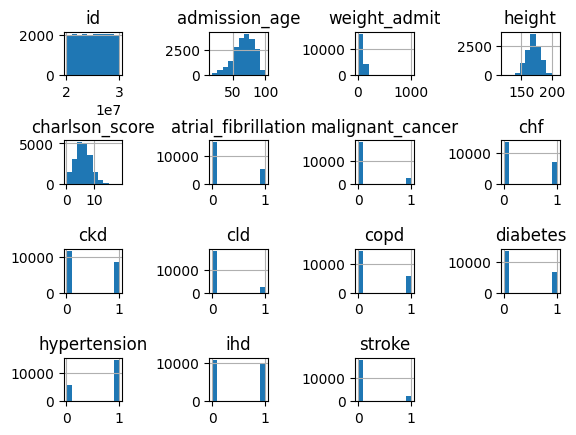

In [ ]:
import matplotlib.pyplot as plt

flat_features.hist()

#MY : avoid overlapping by adding space
plt.subplots_adjust(hspace=1.5, wspace = 1.5)
plt.show()


array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'charlson_score'}>],
       [<Axes: title={'center': 'admission_age'}>,
        <Axes: title={'center': 'weight_admit'}>]], dtype=object)

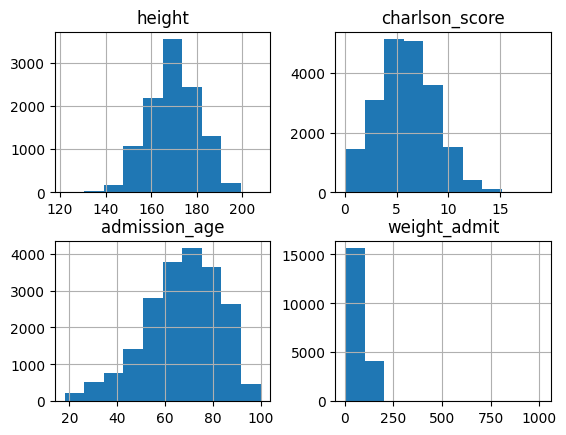

In [ ]:
flat_features.loc[:,['height','charlson_score','admission_age','weight_admit']].hist()

In [ ]:
flat_features.head()

,id,gender,race,admission_age,weight_admit,height,admission_type,first_careunit,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,24099382,M,OTHER,58.441631,92.0,170.0,ELECTIVE,Trauma SICU (TSICU),11,0,0,0,0,0,1,1,1,0,0
1,27824879,F,WHITE,79.748598,55.0,NaN,EW EMER.,Trauma SICU (TSICU),5,0,0,0,0,0,1,0,1,1,0
2,27146619,F,WHITE,81.717397,59.0,NaN,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),8,0,0,1,1,0,0,0,0,1,0
3,22476441,F,BLACK/AFRICAN AMERICAN,63.769278,73.6,160.0,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),8,0,0,1,1,0,1,1,1,1,0
4,23169158,F,WHITE,84.191979,79.1,160.0,OBSERVATION ADMIT,Medical/Surgical Intensive Care Unit (MICU/SICU),6,1,0,1,1,0,0,1,1,0,0


In [ ]:
def preprocess_flat(flat):

    # make naming consistent with the other tables
    flat.rename(columns={'id': 'patient'}, inplace=True)
    flat.set_index('patient', inplace=True)

    # cleaning categorical data:
    # gender:
    flat['gender'].replace({'M': 1, 'F': 0}, inplace=True)

    #race:
    #create list of categories
    race_categories = ['race_ai_an_pi', #"AMERICAN INDIAN/ALASKA NATIVE/PACIFIC ISLANDER"
                      'race_asian', #"ASIAN"
                      'race_black_aa', #"BLACK/AFRICAN AMERICAN"
                      'race_hisp_latino', #"HISPANIC/LATINO"
                      'race_multiple', #"MULTIPLE"
                      'race_white'] #"WHITE"

    #associated static values
    amer_indian = "AMERICAN INDIAN/ALASKA NATIVE|NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER"
    asian = "ASIAN"
    black_aa = "BLACK/AFRICAN|BLACK/AFRICAN AMERICAN|BLACK/CAPE VERDEAN|BLACK/CARIBBEAN ISLAND"
    hisp = "HISPANIC OR LATINO|HISPANIC/LATINO|SOUTH AMERICAN"
    mult = "MULTIPLE RACE/ETHNICITY"
    white = "WHITE"


    conditions = [
        (flat["race"].str.contains(amer_indian)),
        (flat["race"].str.contains(asian)),
        (flat["race"].str.contains(black_aa)),
        (flat["race"].str.contains(hisp)),
        (flat["race"].str.contains(mult)),
        (flat["race"].str.contains(white))
    ]

    flat["race_clean"] = np.select(conditions, race_categories, default="unk_oth") #fill rest in with unknown/other

    # admission type:
    elective_list = ["ELECTIVE", "SURGICAL SAME DAY ADMISSION"]

    flat["admission_type_clean"] = ["elective" if x in elective_list else "emergency" for x in flat["admission_type"]]

    # first care unit
    #we could combine all three neuro ones together. Not ideal but they're tiny:
    icu_categories = ["NEUROICU", #don't use NICU b/c that is neonatal ICU
                  "MICU_SICU",
                  "TSICU",
                  "MICU",
                  "SICU",
                  "CCU",
                  "CVICU"
                ]

    #associated raw_static values
    NEUROICU = "Neuro" #put first otherwise SICU is picked up and Neuro SICU is mismapped
    MICU_SICU = "(MICU/SICU)" #put first
    TSICU = "(TSICU)" #put first
    MICU = "(MICU)"
    SICU = "(SICU)"
    CCU = "(CCU)"
    CVICU = "(CVICU)"


    conditions = [
        (flat["first_careunit"].str.contains(NEUROICU)),
        (flat["first_careunit"].str.contains(MICU_SICU)),
        (flat["first_careunit"].str.contains(TSICU)),
        (flat["first_careunit"].str.contains(MICU)),
        (flat["first_careunit"].str.contains(SICU)),
        (flat["first_careunit"].str.contains(CCU)),
        (flat["first_careunit"].str.contains(CVICU))
    ]

    #apply
    flat["first_careunit_clean"] = np.select(conditions, icu_categories, default="UNKOTH") #fill rest in with unknown/other


    flat.drop(columns=['race','first_careunit','admission_type'], inplace=True)

    cat_features=['race','first_careunit','admission_type']
    col_replace = ['race_clean', 'first_careunit_clean', 'admission_type_clean']

    flat.rename(columns={i:j for i,j in zip(col_replace,cat_features)}, inplace=True)

    # convert the categorical features to one-hot
    flat = pd.get_dummies(flat, columns=cat_features, dtype=int)

    # standardisation is for features that are probably normally distributed
    features_for_standardisation = ['height','charlson_score','weight_admit', 'admission_age']
    means = flat[features_for_standardisation].mean(axis=0)
    stds = flat[features_for_standardisation].std(axis=0)
    flat[features_for_standardisation] = (flat[features_for_standardisation] - means) / stds

    # we then need to make sure that ridiculous outliers are clipped to something sensible
    flat[features_for_standardisation] = flat[features_for_standardisation].clip(lower=-3, upper=3)  # room for +- 3 on each side of the normal range

    # fill in the NaNs
    # these are mainly found in height
    flat['weight_admit'].fillna(0, inplace=True)
    flat['height'].fillna(0, inplace=True)

    flat.sort_index(inplace=True)

    return flat


flat_pre = preprocess_flat(flat_features)


In [ ]:
flat_pre.head()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,race_unk_oth,first_careunit_CCU,first_careunit_CVICU,first_careunit_MICU,first_careunit_MICU_SICU,first_careunit_NEUROICU,first_careunit_SICU,first_careunit_TSICU,admission_type_elective,admission_type_emergency
patient,,,,,,,,,,,,,,,,,,,,,
20001305,0,1.093628,-1.464727,-1.335937,2.130287,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
20001361,1,-2.363275,0.583513,1.253461,-1.986889,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
20001770,0,-2.059891,-0.779626,0.000000,-0.957595,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
20002506,1,-2.756136,-0.899696,0.000000,-0.957595,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
20003425,1,0.601206,-0.451202,0.000000,2.130287,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
flat_pre[['admission_age', 'weight_admit', 'height', 'charlson_score']].describe()

,admission_age,weight_admit,height,charlson_score
count,20414.000000,20414.000000,20414.000000,20414.000000
mean,0.000099,-0.015752,0.000913,-0.001213
std,0.999697,0.854862,0.729292,0.995990
min,-3.000000,-2.983251,-3.000000,-1.986889
25%,-0.630030,-0.603054,-0.133717,-0.614497
50%,0.083726,-0.115714,0.000000,0.071699
75%,0.751795,0.435192,0.051240,0.757895
max,2.109136,3.000000,3.000000,3.000000


In [ ]:
labels = static.iloc[:,[0,5,6]]

<Axes: >

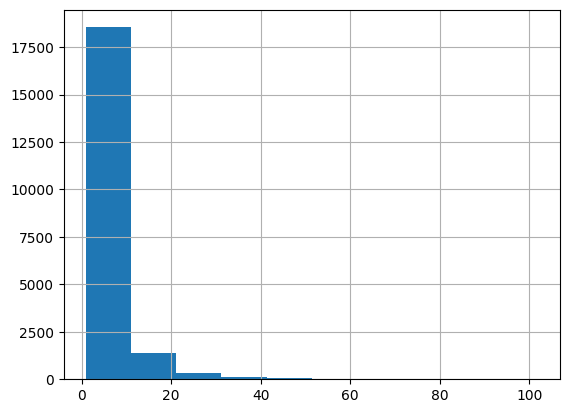

In [ ]:
labels['los_icu'].hist()

In [ ]:
#Quantiles for LOS
labels['los_icu'].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25     1.8000
0.50     2.8800
0.75     5.2800
0.90    10.5700
0.95    15.3470
0.99    30.7292
Name: los_icu, dtype: float64

In [ ]:
def preprocess_labels(labels):

    # make naming consistent with the other tables
    labels.rename(columns={'id': 'patient'}, inplace=True)
    labels.set_index('patient', inplace=True)

    #removing LOS above 99% qunatile
    print('max los before removing:',labels.los_icu.max() )
    labels = labels[labels.los_icu < labels.los_icu.quantile(.99)].copy()

    print('max los after removing above 99% quantile:',labels.los_icu.max() )

    labels.sort_index(inplace=True)

    return labels

labels_pre = preprocess_labels(labels)

In [ ]:
labels_pre.head()

,los_icu,icu_death
patient,,
20001305,2.78,1
20001361,6.05,0
20001770,2.87,0
20002506,6.56,0
20003425,4.00,0


#Saving processed data

In [ ]:
save_path = '/content/gdrive/My Drive/Colab Notebooks/SHP6004/TeamShare/ProcessedData/'
flat_pre.to_csv(save_path + 'preprocessed_staticFeatures_SB.csv')
labels_pre.to_csv(save_path + 'preprocessed_labels_SB.csv')